In [4]:
import pandas as pd
from scipy import stats
import numpy as np
from common import get_set

In [5]:
all_training_set = get_set(folder='Class dataframes', positions=None, aslist=False)

In [6]:
def display_classes():
    for i in all_training_set:
        all_training_set[i].plot(kind="box",title=i)
        all_training_set[i].hist(bins =20)

# Outliers

#### We will work with the minmax scaler in the Scikit-learn package. Before scale the data we will look at some statistics. Below we will work with the training files only.

##### Use the describe method for all seven classes. What are the differences between all classes? What statistic measure is different for the classes?
High standard deviation for movement classes, which is expected. Similar, the range (min and max) is higher for movement classes compared to stationary positions.

In [7]:
for i in all_training_set:
   print(f"{i}\n{all_training_set[i].describe()}\n")

Jumping
                ax           ay           az           gx           gy  \
count  3090.000000  3090.000000  3090.000000  3090.000000  3090.000000   
mean     -1.551621    -9.174159    -3.837182     0.000534    -0.010795   
std       3.458990    10.161021     4.120019     1.404017     0.681785   
min     -14.317155   -38.317467   -27.945776    -3.827874    -2.397117   
25%      -3.420839   -19.060327    -6.006284    -1.023475    -0.442101   
50%      -0.880260    -4.036393    -3.048157    -0.248309    -0.042912   
75%       0.885344    -0.815055    -1.062413     1.113880     0.347878   
max      10.763515     6.382854    15.083457     3.508554     3.921639   

                gz  
count  3090.000000  
mean      0.007529  
std       0.435967  
min      -1.586218  
25%      -0.270453  
50%      -0.007177  
75%       0.267818  
max       1.809024  

Laying_down
                ax           ay           az           gx           gy  \
count  3149.000000  3149.000000  3149.000000  314

##### Make boxplots of each class as well.

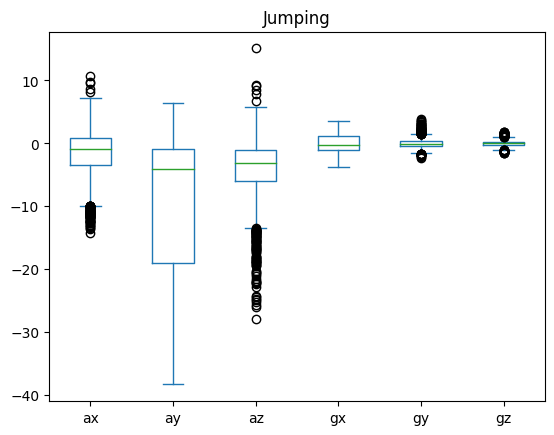

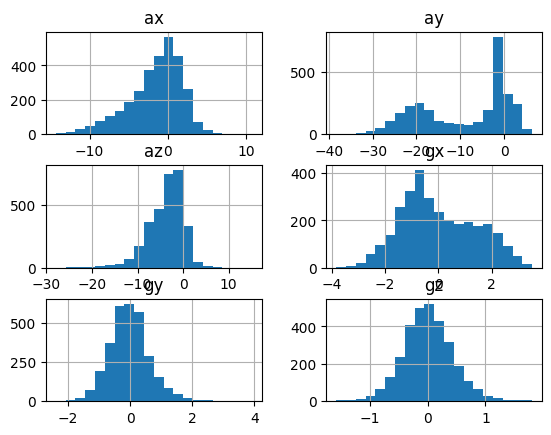

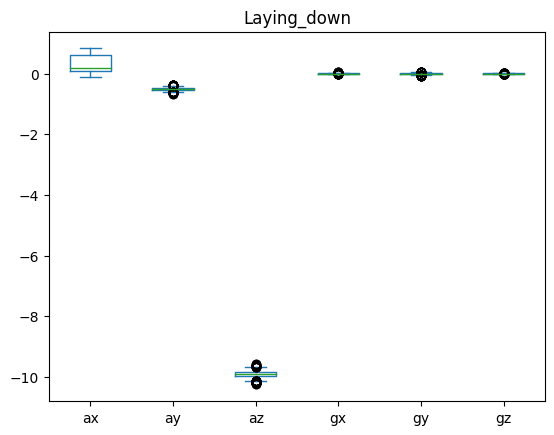

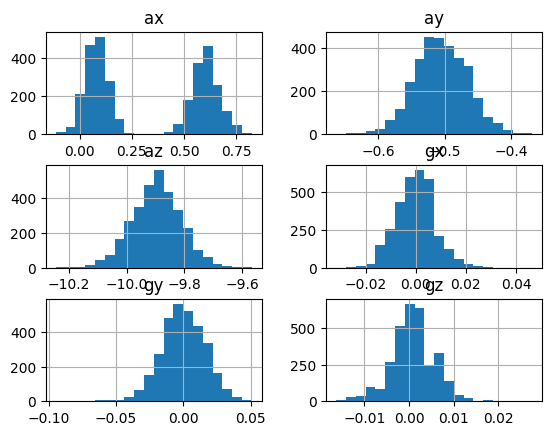

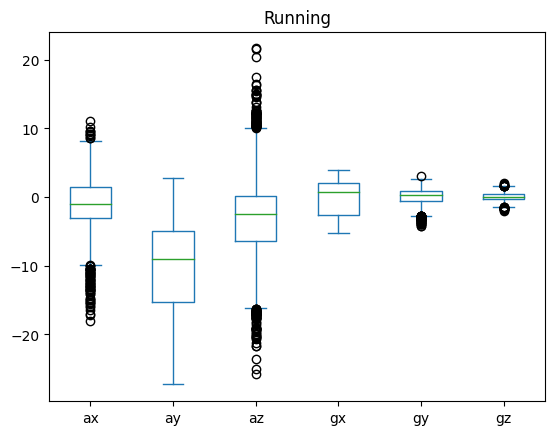

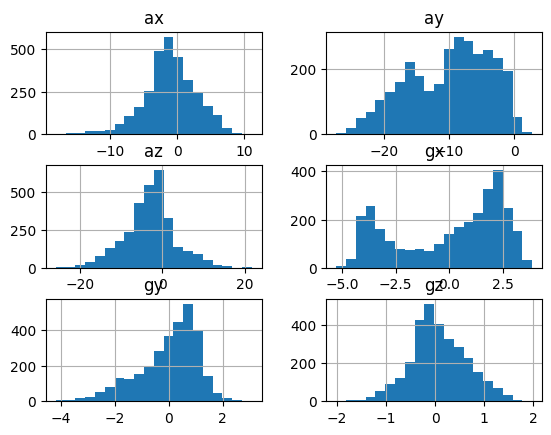

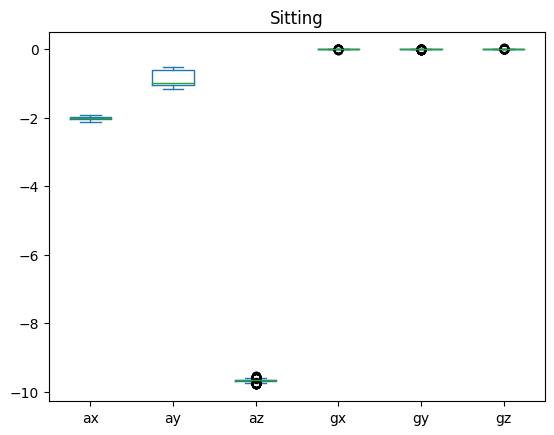

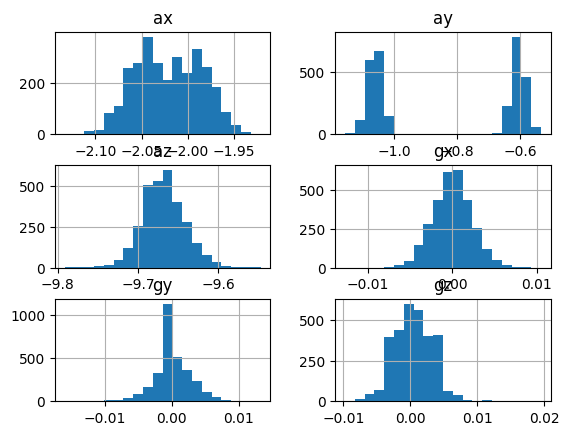

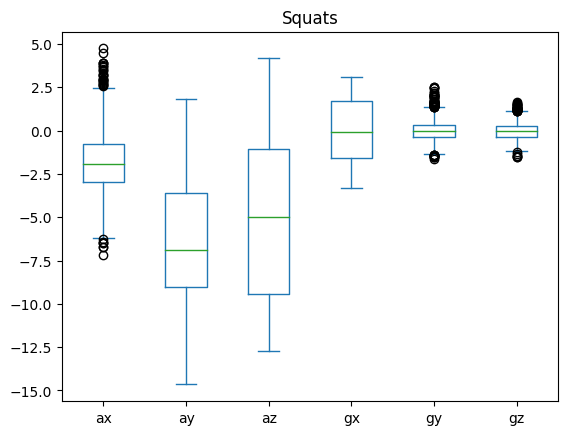

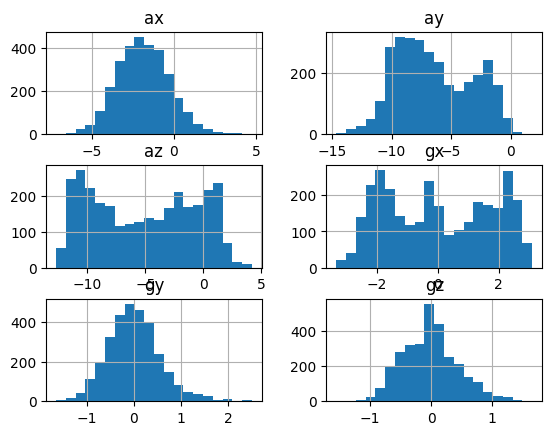

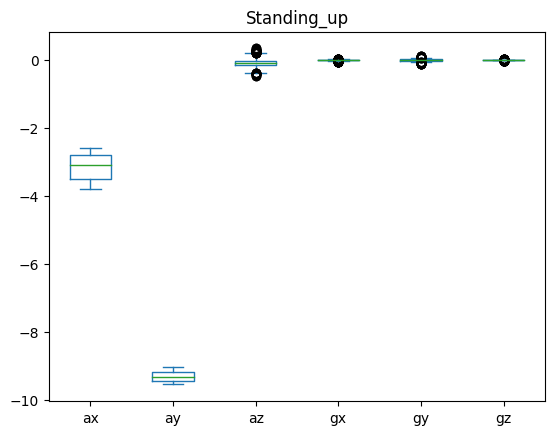

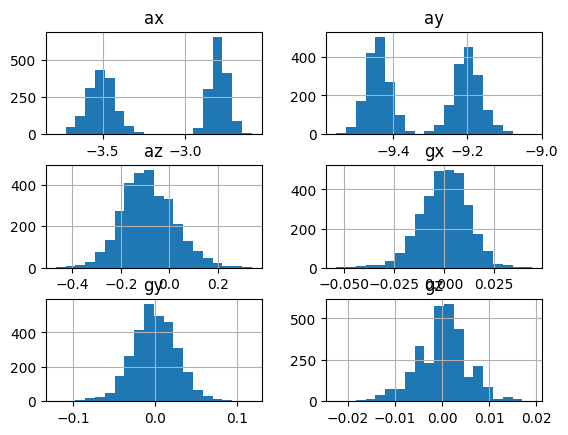

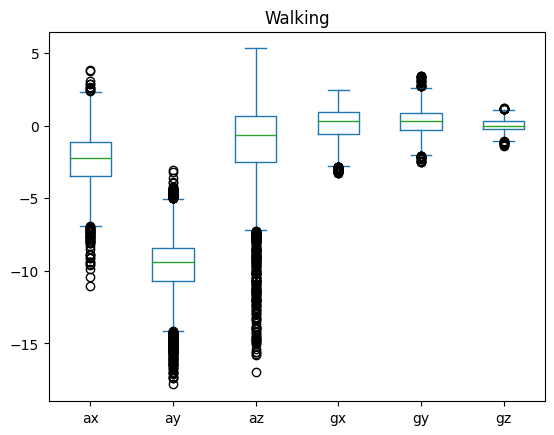

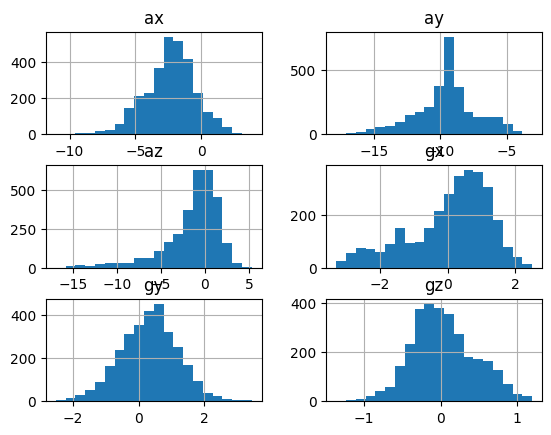

In [8]:
display_classes()

Stationary positions show minimal outliers. However, movements, especially walking, contain many outliers. 
Based on that, no outliers are removed for stationary positions. 
Arguably, outliers for movement classes are not outliers as we expect a large range of values for each feature. The standard deviation for movements is ~3–4, which is expected in movements.

The gyroscope feature values are hard to analyze as they are all clustered together.

# Testing
#### Checking if removing the outliers is necessary.
The features for most classes are normally distributed. Hence, Z-score is used to eliminate outliers by replacing them with the mean of its respective column.

In [9]:
outlier_threshold = 3 

In [10]:
for _class in all_training_set.values():
    for column in _class.columns.values:
        if column == 'class':
            break

        column_mean = _class[column].mean()
        z_scores = pd.DataFrame(stats.zscore(_class[column]).apply(lambda f: np.abs(f) > outlier_threshold))
        true_z_scores = pd.DataFrame(z_scores[z_scores[column] == True])
        _class.loc[true_z_scores.index, column] = column_mean    

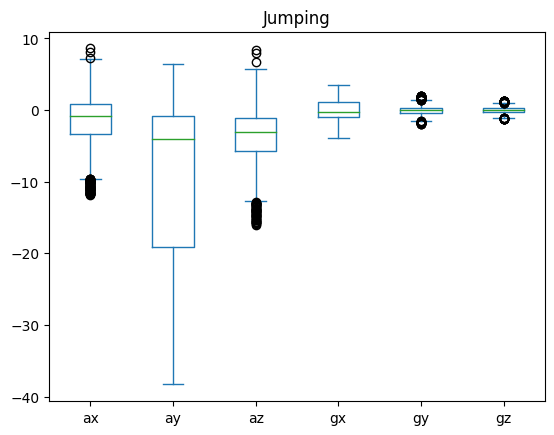

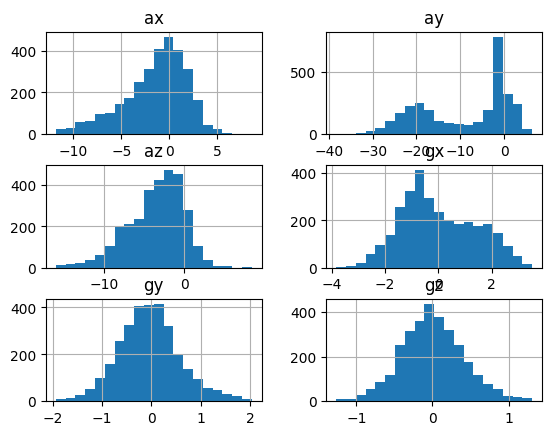

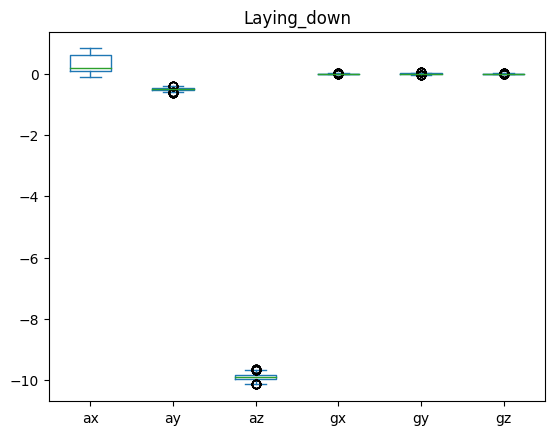

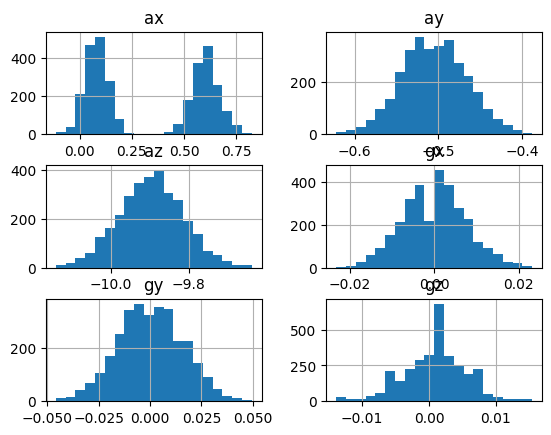

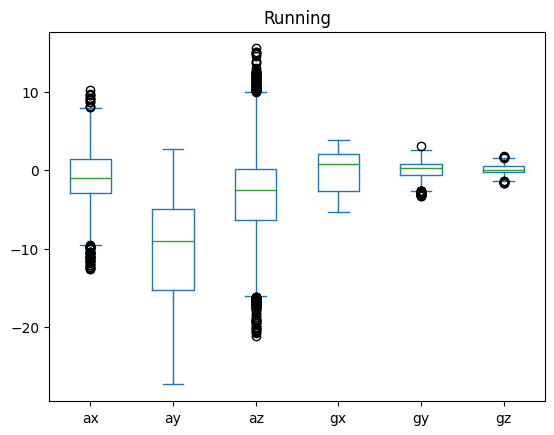

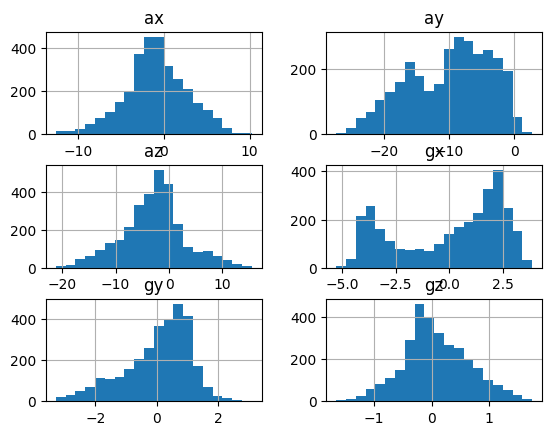

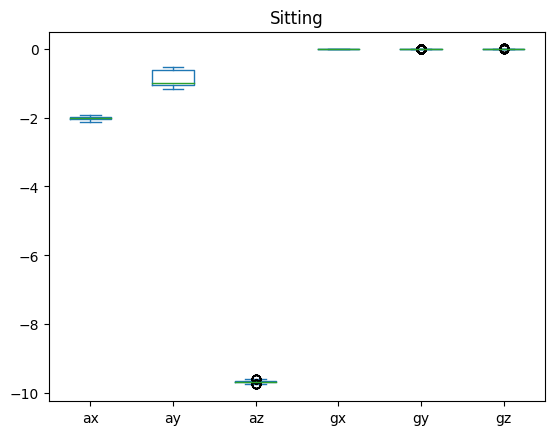

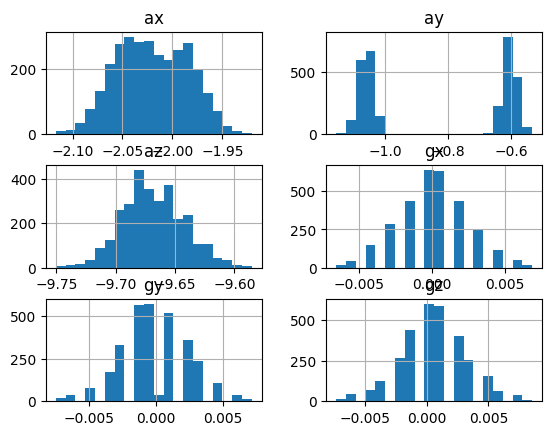

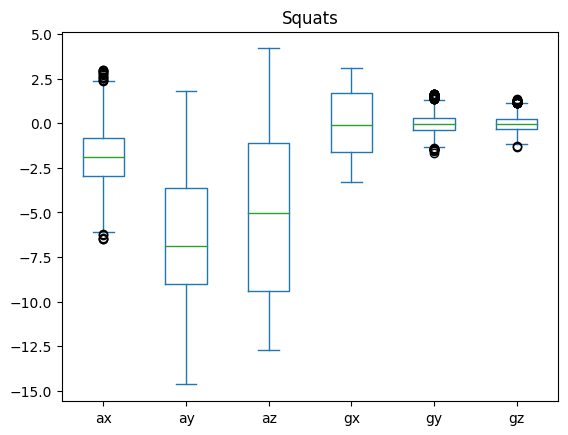

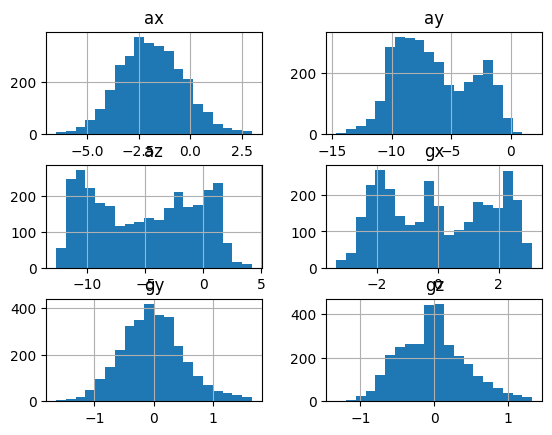

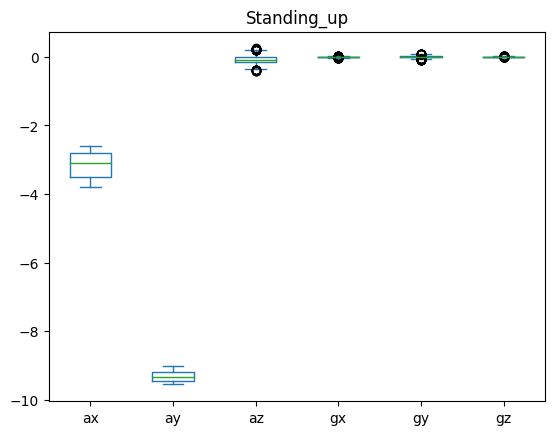

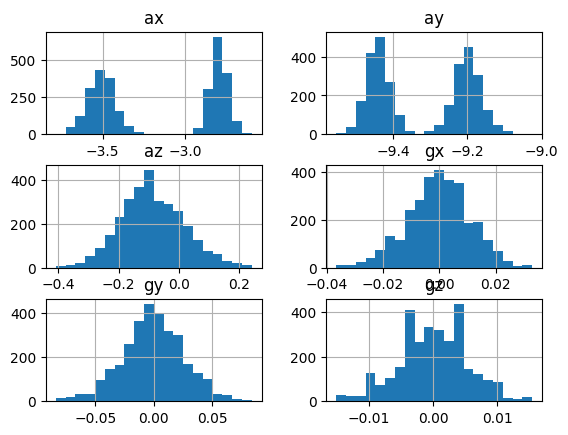

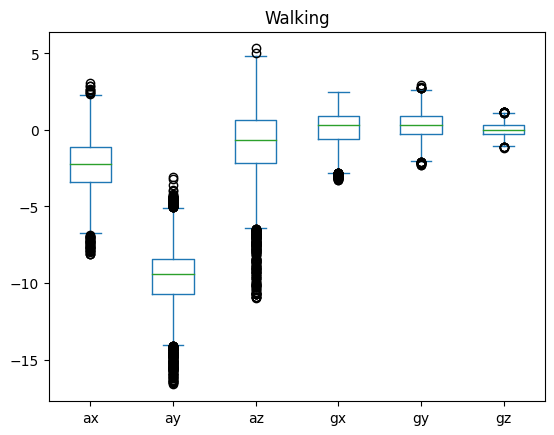

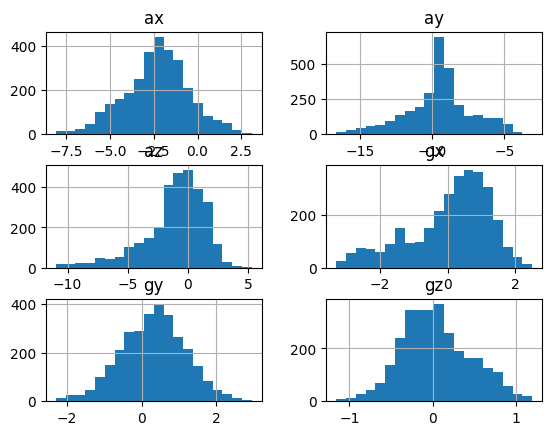

In [11]:
display_classes()